I'm using the conda 3.12 environment when it's running locally.  I had to manually install the following.

```sh
conda env list
conda activate py3.12
conda install -c conda-forge python-dotenv
conda install pillow
pip install openai==1.1.1
conda install requests
```

However, when using Github codespace, conda is not working, but venv is, so the above is not necessary when working in codespace.


In [1]:
!pip show openai


Name: openai
Version: 1.1.1
Summary: Client library for the openai API
Home-page: 
Author: 
Author-email: OpenAI <support@openai.com>
License: 
Location: /workspaces/ai-experiments/venv/lib/python3.10/site-packages
Requires: anyio, distro, httpx, pydantic, tqdm, typing-extensions
Required-by: 


In [2]:
import os
import openai
from openai import OpenAI

api_key=os.environ["OPENAI_API_KEY"]
client = OpenAI(api_key=api_key)

DALL-E 3

In [3]:
PROMPT = "a room full of dogs all meditating in a circle"

In [4]:
import openai
from openai import OpenAI
client = OpenAI(api_key=api_key)

response = client.images.generate(
  model="dall-e-3",
  prompt= PROMPT,
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url = response.data[0].url
image_url

'https://oaidalleapiprodscus.blob.core.windows.net/private/org-3Ei0iqcWZOIg7fs9QRxa4srN/user-TAKHWC1qaO1ZBXgUaVY8eM6I/img-ZQn86ZDPtYdKZS40GEWdZJbz.png?st=2023-11-15T20%3A50%3A06Z&se=2023-11-15T22%3A50%3A06Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-11-15T21%3A42%3A34Z&ske=2023-11-16T21%3A42%3A34Z&sks=b&skv=2021-08-06&sig=lDgoLIOzJEhLZVb7VUfIzpq6T/4jhKSvKCZMivXg//4%3D'

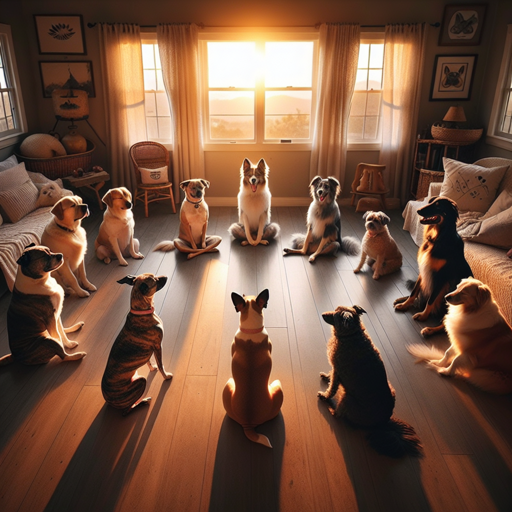

In [5]:
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

def display_and_save_image_from_url(url, scale_percent=100, save_name='image.png'):
    # Send a GET request to the specified URL to retrieve the image
    response = requests.get(url)
    # Open the image
    img = Image.open(BytesIO(response.content))

    # Calculate the new size, as a percentage of the original size
    if scale_percent != 100:
        width, height = img.size
        new_width = int(width * scale_percent / 100)
        new_height = int(height * scale_percent / 100)
        img = img.resize((new_width, new_height))

    # Save the image locally with the given name
    img.save(save_name)

    # Display the image in the notebook
    display(img)

# Call the function with the URL, the scale percentage, and the save name you want
display_and_save_image_from_url(image_url, scale_percent=50, save_name='../tmp/meditating_dogs.png')

GPT Voice


In [8]:
import base64
import requests

# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "../tmp/meditating_dogs.png"

# Getting the base64 string
base64_image = encode_image(image_path)

headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {os.environ['OPENAI_API_KEY']}"
}

payload = {
    "model": "gpt-4-vision-preview",
    "messages": [
      {
        "role": "user",
        "content": [
          {
            "type": "text",
            "text": "Describe what's in this image in detail as a story?"
          },
          {
            "type": "image_url",
            "image_url": {
              "url": f"data:image/jpeg;base64,{base64_image}"
            }
          }
        ]
      }
    ],
    "max_tokens": 300
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

print(response.json())

{'id': 'chatcmpl-8LI5kLhk8dKgZFHzZDV8nnkAT43HU', 'object': 'chat.completion', 'created': 1700085124, 'model': 'gpt-4-1106-vision-preview', 'usage': {'prompt_tokens': 274, 'completion_tokens': 300, 'total_tokens': 574}, 'choices': [{'message': {'role': 'assistant', 'content': "Once upon a time in a cozy living room bathed in the warm golden glow of a setting sun, a gathering of canines from various breeds had assembled for an extraordinary meeting. The long shadows cast on the wooden floorboards told tales of the day nearing its end, while the tranquility of the room whispered of moments about to unfold.\n\nEleven dogs, each with a unique coat and features, sat patiently, as if waiting for an event of great importance. Their orientation towards the stunning sunset framed by the room's window created an atmosphere of serene anticipation.\n\nIn the soft backlight, two dogs to the left, possibly siblings with their matching coats, appeared to exchange knowing glances. The central figure, a

In [9]:
story = response.json()['choices'][0]['message']['content']

print(story)

Once upon a time in a cozy living room bathed in the warm golden glow of a setting sun, a gathering of canines from various breeds had assembled for an extraordinary meeting. The long shadows cast on the wooden floorboards told tales of the day nearing its end, while the tranquility of the room whispered of moments about to unfold.

Eleven dogs, each with a unique coat and features, sat patiently, as if waiting for an event of great importance. Their orientation towards the stunning sunset framed by the room's window created an atmosphere of serene anticipation.

In the soft backlight, two dogs to the left, possibly siblings with their matching coats, appeared to exchange knowing glances. The central figure, a poised and attentive dog, sat facing the sun directly, as if given the honor of leading the assembly or about to give a speech to his gathered companions.

Their audience was as diverse as they come - from the small and fluffy one that seemed to wear a thoughtful expression, to t

## Text To Speech


In [10]:
from IPython.display import Audio
from pathlib import Path

response = client.audio.speech.create(
  model="tts-1",
  voice="onyx",
  input=story
)

# Define the path where you want to save the file
speech_file_path = Path('../tmp/story.mp3')

# Save the response content (binary content of the mp3 file) to the path
with open(speech_file_path, 'wb') as file:
    file.write(response.content)

# Play the audio file
Audio(speech_file_path, autoplay=True)
